In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.stats as st
import pylab 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as sgt
import warnings
warnings.filterwarnings("ignore")

<h1>EDA</h1>

In [2]:
gym = pd.read_csv(r"D:\ml_pratice\gym\data.csv")

In [3]:
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
gym.tail()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19
62183,23,2017-03-18 19:22:51-07:00,69771,5,1,0,56.71,0,1,3,19


In [5]:
gym[gym["number_people"] == 138]

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
15508,138,2016-01-20 20:40:15-08:00,74415,2,0,0,53.51,1,1,1,20


In [6]:
gym["number_people"].nunique()

128

In [7]:
gym["number_people"].unique()

array([ 37,  45,  40,  44,  46,  43,  53,  54,  39,  38,  41,  36,  42,
        35,  48,  49,  33,  22,   2,   1,   0,   3,   6,  15,  18,  21,
        26,  23,  28,  30,  32,  29,  34,  27,  31,  25,  24,  12,  17,
         4,  11,  16,  20,  19,  14,   9,  13,  50,  47,  55,  68,  58,
        65,  63,  74,  69,  60,  73,  52,  66,  64,   7,  10,  61,  51,
        62,  56,  71,  72,  67,   5,  70,  57,  59,   8,  75, 134, 139,
       119, 145, 105,  93, 115, 108, 111, 102,  98,  89,  78,  83,  84,
        77,  80,  81,  87,  88,  92,  76,  82,  79, 104,  96,  91,  94,
        86,  90,  85,  95, 101, 100, 106, 103, 110, 117, 114, 118,  97,
        99, 109, 107, 124, 112, 113, 116, 123, 121, 125, 138], dtype=int64)

In [8]:
gym[gym["number_people"] == 145]

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
932,145,2015-08-24 13:20:17-07:00,48017,0,0,0,66.87,0,0,8,13


In [9]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [10]:
gym.shape

(62184, 11)

In [11]:
gym["day_of_week"].unique()

array([4, 5, 6, 0, 1, 2, 3], dtype=int64)

In [12]:
gym.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [13]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [14]:
gym["hour"].nunique()

24

In [15]:
gym["date"].nunique()

62184

<h1> Feature Engineering </h1> 

In [16]:
gym_copy = gym.copy()

In [17]:
gym_copy.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [18]:
gym_copy.drop(columns = ["timestamp","month","is_start_of_semester","is_during_semester","is_weekend","hour"], inplace = True)

In [19]:
gym_copy["date"] = pd.to_datetime(gym_copy["date"], utc = True)

In [20]:
gym_copy["date"] = gym_copy["date"].dt.date

In [21]:
gym_copy["number_people"].shape

(62184,)

In [22]:
gym_copy["temperature"].shape


(62184,)

In [23]:
gym_copy.head()

,number_people,date,day_of_week,is_holiday,temperature
0,37,2015-08-15,4,0,71.76
1,45,2015-08-15,4,0,71.76
2,40,2015-08-15,4,0,71.76
3,44,2015-08-15,4,0,71.76
4,45,2015-08-15,4,0,71.76


In [24]:
gym_copy["date"] = pd.to_datetime(gym_copy["date"])

In [25]:
gym_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   number_people  62184 non-null  int64         
 1   date           62184 non-null  datetime64[ns]
 2   day_of_week    62184 non-null  int64         
 3   is_holiday     62184 non-null  int64         
 4   temperature    62184 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.4 MB


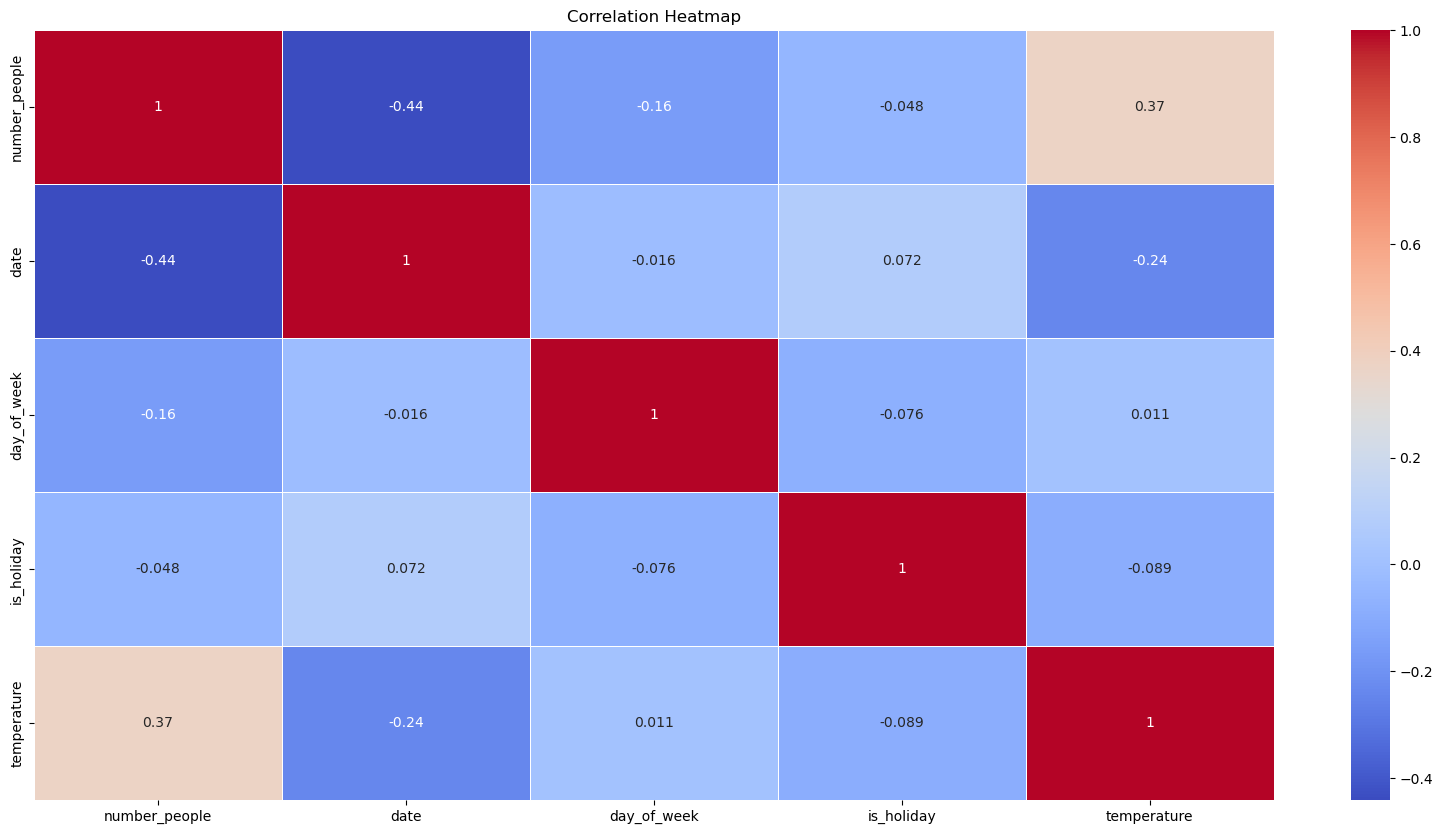

In [26]:
corr_matrix = gym_copy.corr()
plt.figure(figsize=(20, 10)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<h1>Visualization</h1>

<Axes: ylabel='number_people'>

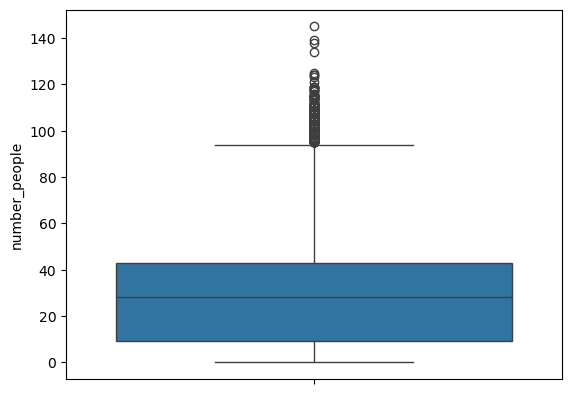

In [27]:
sns.boxplot(gym_copy["number_people"])

Text(0, 0.5, 'Number of people')

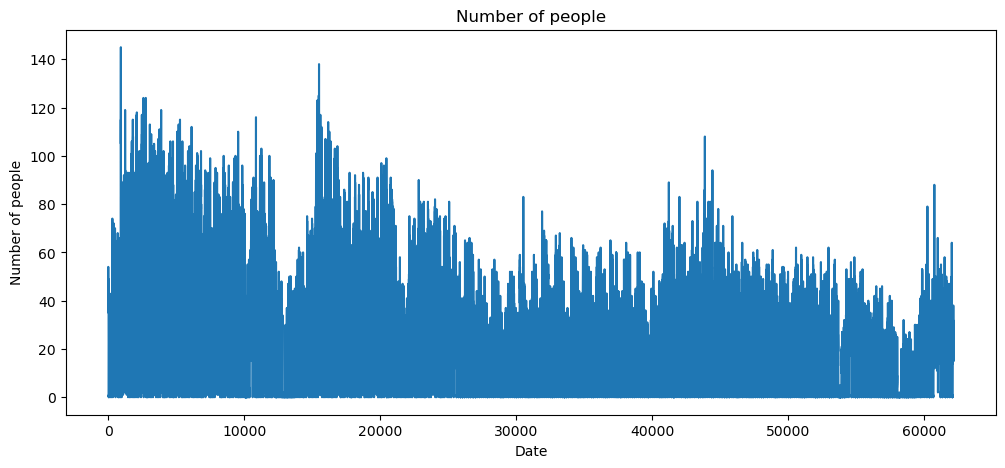

In [28]:
plt.figure(figsize = (12,5))
plt.plot(gym_copy["number_people"])
plt.title("Number of people")
plt.xlabel("Date")
plt.ylabel("Number of people")

Text(0.5, 1.0, 'QQ plot- Quantile Quantile')

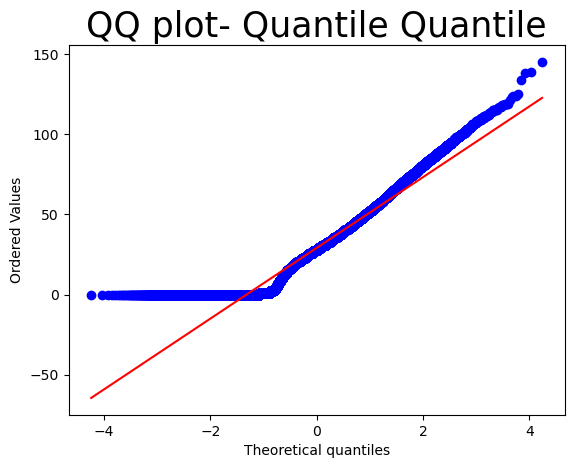

In [29]:
st.probplot(
    gym_copy.number_people,plot = pylab
)
plt.title("QQ plot- Quantile Quantile",
         size = 25)

In [30]:
gym_copy.set_index("date", inplace = True)

In [31]:
gym_copy.head()

,number_people,day_of_week,is_holiday,temperature
date,,,,
2015-08-15,37,4,0,71.76
2015-08-15,45,4,0,71.76
2015-08-15,40,4,0,71.76
2015-08-15,44,4,0,71.76
2015-08-15,45,4,0,71.76


In [32]:
gym_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62184 entries, 2015-08-15 to 2017-03-19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   number_people  62184 non-null  int64  
 1   day_of_week    62184 non-null  int64  
 2   is_holiday     62184 non-null  int64  
 3   temperature    62184 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.4 MB


In [33]:
gym_copy.index = pd.to_datetime(gym_copy.index)

<h3>Seasonality</h3>

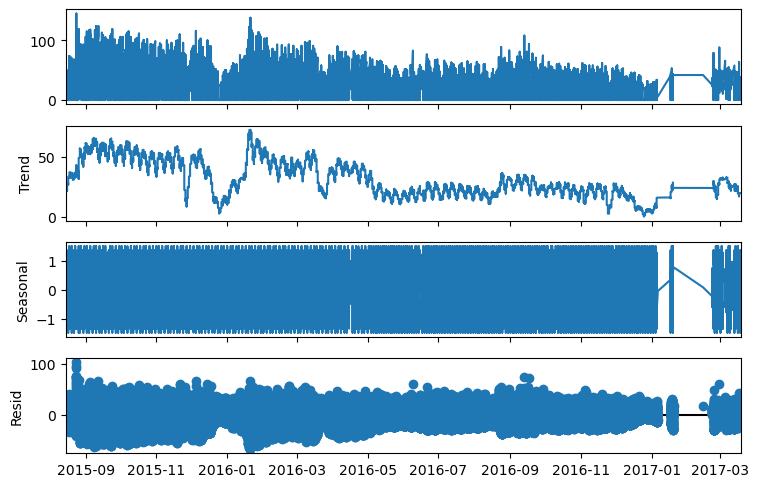

In [34]:
Seasonality = seasonal_decompose(gym_copy[["number_people"]], model='additive', period=260)
fig = Seasonality.plot()
fig.set_size_inches(8, 5)
plt.show()

<h2> Stationarity Test </h2>

In [35]:
adfuller(gym_copy["number_people"])

(-20.25295182519892,
 0.0,
 60,
 62123,
 {'1%': -3.430455268100807,
  '5%': -2.8615865265387295,
  '10%': -2.5667947645029496},
 402009.02242812084)

<h2>ACF and PACF</h2>

Text(0.5, 1.0, 'ACF ftse')

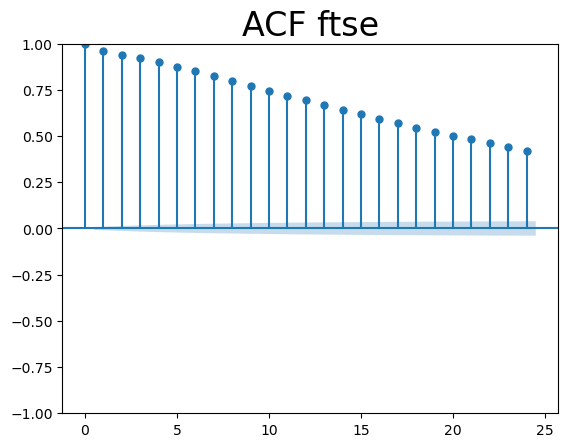

In [36]:
sgt.plot_acf(gym_copy.number_people, lags = 24)
plt.title("ACF ftse", size = 24)

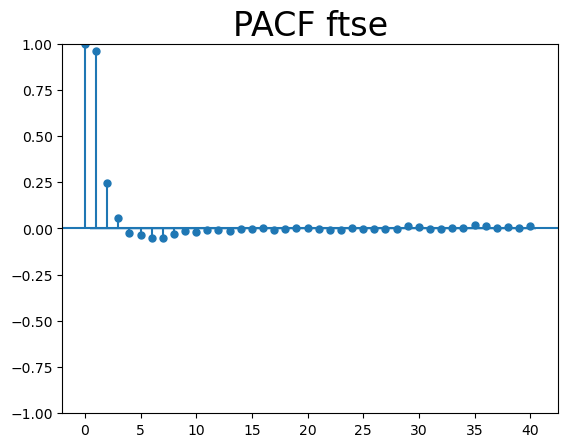

In [37]:
sgt.plot_pacf(gym_copy.number_people, lags = 40)
plt.title("PACF ftse", size = 24)
plt.show()

<h1>Splitting the Data</h1>

In [38]:
# size = int(len(gym_copy)*0.8) #row 80%

In [39]:
# size

In [ ]:
# df_test = gym_copy.iloc[size:]

In [40]:
# df_train = gym_copy.iloc[:size]

In [41]:
# df_test.head()

<h1>Model</h1>

<h2>SARIMA</h2>

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
sarima_model = SARIMAX(gym_copy["number_people"], order=(1,0,1), seasonal_order =(1,0,1,24) )

In [45]:
sarima_model_fit = sarima_model.fit()

(0.0, 4000.0)

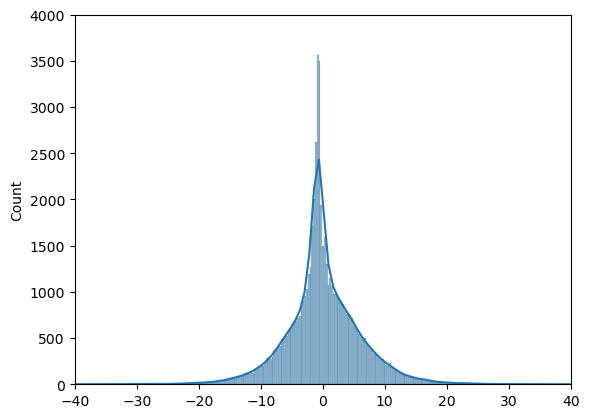

In [46]:
sns.histplot(sarima_model_fit.resid, kde = True)
plt.xlim(-40, 40)
plt.ylim(0, 4000)

In [47]:
sarima_forecast = sarima_model_fit.forecast(steps=10)
print(sarima_forecast)


62184    22.062142
62185    21.724597
62186    21.581315
62187    21.599677
62188    21.522355
62189    21.388491
62190    21.455038
62191    21.285039
62192    21.202861
62193    21.293613
Name: predicted_mean, dtype: float64


In [48]:
sarima_forecast.index = pd.date_range(start=gym_copy.index[-1], periods=len(sarima_forecast), freq="H")

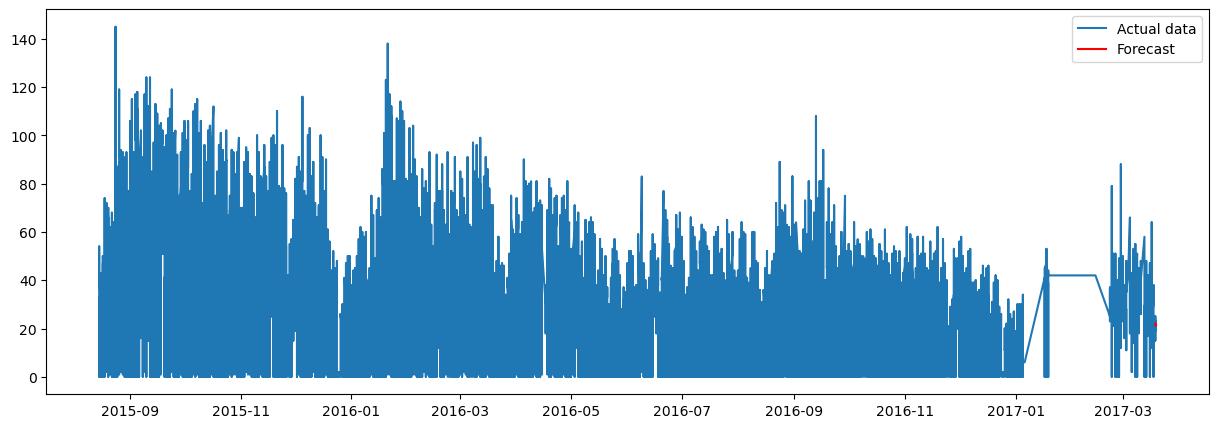

In [52]:
plt.figure(figsize=(15,5))

plt.plot(gym_copy.index, gym_copy["number_people"], label="Actual data")
plt.plot(sarima_forecast, label="Forecast", color="red")
plt.legend()
plt.show()

<h2>LSTM </h2>

In [39]:
pip install tensorflow 


     ---------------------------------------- 0.0/48.6 kB ? eta -:--:--
     ------------------------ ------------- 30.7/48.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 48.6/48.6 kB 618.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 3.2 MB/s eta 0:02:02
   ---------------------------------------- 0.3/390.3 MB 3.5 MB/s eta 0:01:51
   ---------------------------------------- 0.5/390.3 MB 4.3 MB/s eta 0:01:32
   ---------------------------------------- 1.0/390.3 MB 5.8 MB/s eta 0:01:08
   ---------------------------------------- 1.0/390.3 MB 5.8 MB/s eta 0:01:08
   ---------------------------------------- 1.6/390.3 MB 5.9 MB/s eta 0:01:07
   ---------------------------------------- 2.4/390.3 MB 7.5 MB/s eta 0:00:52
   ---------------------------------------- 3.1/390.3 MB 8.6 MB/s eta 0:00:46
   ---------------------------------------- 3.7/390.3 MB 9.2 MB/s eta 0:

In [38]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [39]:
scaler = MinMaxScaler()

In [40]:
gym_copy_scaler = scaler.fit_transform(gym_copy)

In [41]:
train,test = train_test_split(gym_copy,test_size = 0.10, shuffle = False)

In [42]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [43]:
train = np.array(train['number_people']).reshape(-1, 1)
test = np.array(test['number_people']).reshape(-1, 1)

In [44]:
n_input = 24
n_feature = 1

generator_train = TimeseriesGenerator(train, train, length = n_input, batch_size = 1)
generator_test = TimeseriesGenerator(test, test, length = n_input, batch_size = 1)

In [45]:
batch_0 = generator_train[0]
x,y = batch_0

In [46]:
print(x,y)

[[[37]
  [45]
  [40]
  [44]
  [45]
  [46]
  [43]
  [53]
  [54]
  [43]
  [39]
  [38]
  [45]
  [41]
  [36]
  [42]
  [35]
  [36]
  [48]
  [40]
  [49]
  [37]
  [48]
  [45]]] [[45]]


In [47]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM 
from tensorflow.keras.optimizers import Adam


In [48]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [ ]:
model = Sequential()
model.add(LSTM(100, activation = "tanh", input_shape = (n_input, n_feature)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=00.005), loss="mean_squared_error")
model.fit(generator_train, epochs = 100, batch_size = 64, shuffle = False)

Epoch 1/100
55941/55941 ━━━━━━━━━━━━━━━━━━━━ 377s 7ms/step - loss: 94.3916
Epoch 2/100
55941/55941 ━━━━━━━━━━━━━━━━━━━━ 382s 7ms/step - loss: 70.8117
Epoch 3/100
55941/55941 ━━━━━━━━━━━━━━━━━━━━ 385s 7ms/step - loss: 68.2928
Epoch 4/100
55941/55941 ━━━━━━━━━━━━━━━━━━━━ 379s 7ms/step - loss: 64.4456
Epoch 5/100
55941/55941 ━━━━━━━━━━━━━━━━━━━━ 386s 7ms/step - loss: 64.9845
Epoch 6/100
55941/55941 ━━━━━━━━━━━━━━━━━━━━ 383s 7ms/step - loss: 64.2523
Epoch 7/100
55941/55941 ━━━━━━━━━━━━━━━━━━━━ 383s 7ms/step - loss: 66.2703
Epoch 8/100
55941/55941 ━━━━━━━━━━━━━━━━━━━━ 384s 7ms/step - loss: 64.1867
Epoch 9/100
55941/55941 ━━━━━━━━━━━━━━━━━━━━ 388s 7ms/step - loss: 63.9573
Epoch 10/100
55941/55941 ━━━━━━━━━━━━━━━━━━━━ 385s 7ms/step - loss: 62.6525
Epoch 11/100
55941/55941 ━━━━━━━━━━━━━━━━━━━━ 392s 7ms/step - loss: 65.0083
Epoch 12/100
55941/55941 ━━━━━━━━━━━━━━━━━━━━ 395s 7ms/step - loss: 61.5774
Epoch 13/100
55941/55941 ━━━━━━━━━━━━━━━━━━━━ 394s 7ms/step - loss: 62.3849
Epoch 14/100
55941/55

In [ ]:
LSTM_prediction = []
first_batch = train[-n_input:]
